# Car Price Regression Analysis

---
Rohit Baney    
6th August 2021

---

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Libraries and Data

In [2]:
#Install Libraries
#Uncomment (remove '#') from the following 6 lines if you have never installed these libraries before
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn
# !pip install xgboost

#Import Libraries
#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

#Metrics
from sklearn.metrics import r2_score

In [3]:
#Load Data
cars_data = pd.read_csv('CarPrice_Assignment.csv', index_col = 'car_ID')
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Exploration and Cleaning

In [4]:
#Getting Information about the dataset
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
#Acquiring information about the numeric data in the dataframe
cars_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Text(0.5, 1.0, 'Box Plot')

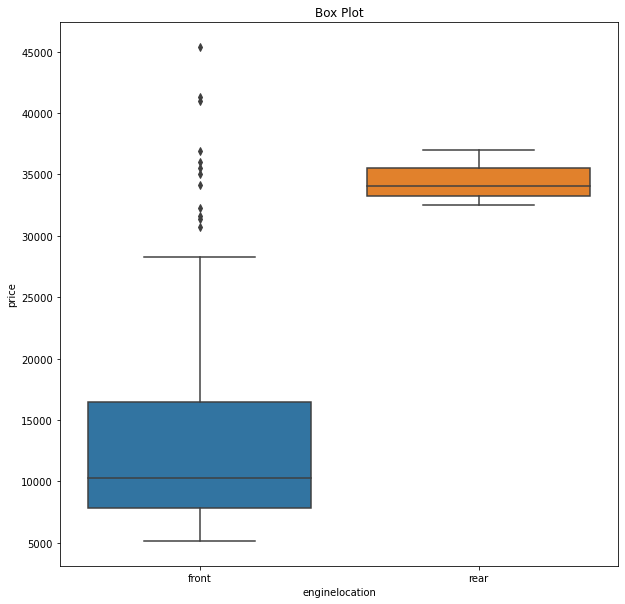

In [6]:
ax, fig = plt.subplots(figsize = (10,10))
sns.boxplot(x = 'enginelocation',
            y = 'price', 
            data = cars_data)
plt.title('Box Plot')

Text(0.5, 1.0, 'Linear Model Plot')

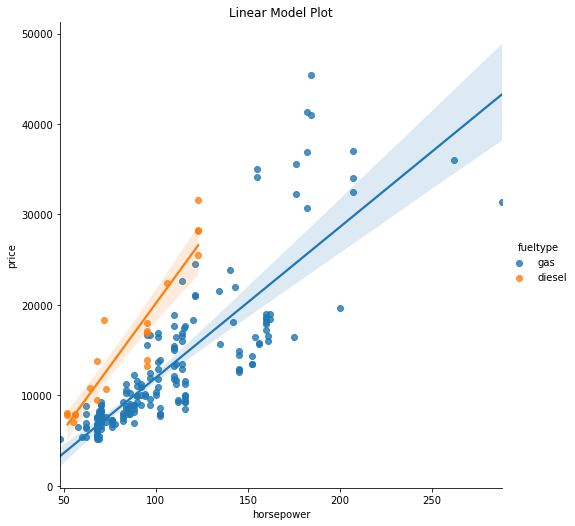

In [7]:
sns.lmplot(x = 'horsepower', 
           y = 'price', 
           hue = 'fueltype', 
           data = cars_data,
           size = 7)
plt.title('Linear Model Plot')

Text(0.5, 1.0, 'Scatter Plot')

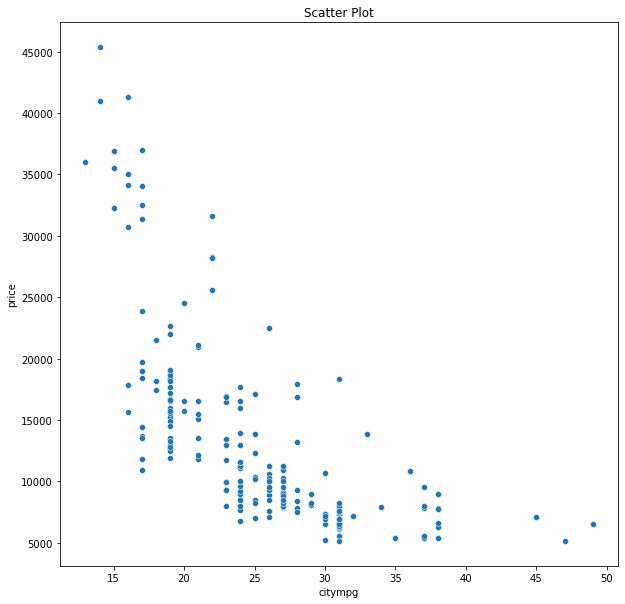

In [8]:
ax, fig = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'citympg', 
                y = 'price', 
                data = cars_data)
plt.title('Scatter Plot')

## Feature Engineering

Text(0.5, 0, 'Total Size of Car')

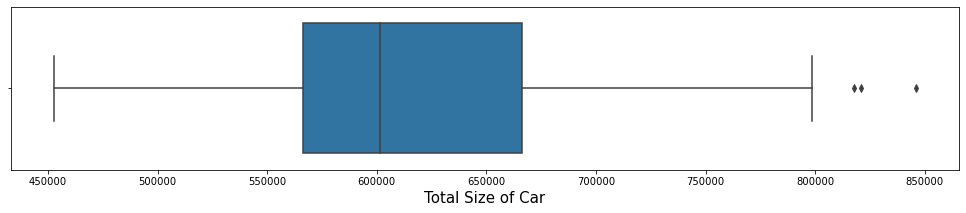

In [9]:
#Creating new features
cars_data['totalsize'] = cars_data['carlength'] * cars_data['carwidth'] * cars_data['carheight']

plt.subplots(figsize = (17,3))

sns.boxplot(cars_data['totalsize'])
plt.xlabel('Total Size of Car', size = 15)

## Encoding

In [10]:
#Encoding the cateogrical data
categorical_columns = cars_data.select_dtypes('object').columns #Extract all the column names with categorical data
label_encoder = LabelEncoder()#Instantiate Label Encoder

#Goes through all columns in the dataframe with categorical data and replaces categories with numeric data
for column in categorical_columns:
    temp = label_encoder.fit_transform(cars_data[column])
    cars_data[column] = temp
    
cars_data[categorical_columns]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,2,1,0,1,0,2,0,0,2,5
2,3,1,0,1,0,2,0,0,2,5
3,1,1,0,1,2,2,0,5,3,5
4,4,1,0,0,3,1,0,3,2,5
5,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
201,139,1,0,0,3,2,0,3,2,5
202,138,1,1,0,3,2,0,3,2,5
203,140,1,0,0,3,2,0,5,3,5


In [11]:
#Checking to see if all the data is in a numeric format
cars_data.dtypes

symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
totalsize           float64
dtype: object

## Regression Model

In [12]:
#Spliting data into features and label
x = cars_data.drop(columns = ['price']) #Features
y = cars_data['price'] #Label

#Splitting the data into Training and Testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 32)

print("Shapes of dataframes: \n",
f'x_train:\t{x_train.shape} \n',
f'x_test:\t{x_test.shape} \n',
f'y_train:\t{y_train.shape} \n',
f'y_test:\t{y_test.shape}')

Shapes of dataframes: 
 x_train:	(143, 25) 
 x_test:	(62, 25) 
 y_train:	(143,) 
 y_test:	(62,)


### Decision Tree Regressor

In [14]:
#Fitting the data to a Decision Tree Model
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train) #Fitting the data
y_pred = dtr.predict(x_test) #Creating a prediction

print(f"Decision Tree Regressor Score: {r2_score(y_pred, y_test):.4f}") #Evaluating results

Decision Tree Regressor Score: 0.9073


### Linear Regression

In [15]:
#Fitting the data to the linear regression model and evaluating the prediction
lr = LinearRegression() #Instantiating the model
lr.fit(x_train, y_train) #Fitting the data
y_pred = lr.predict(x_test) #Creating a prediction

print(f"Linear Regression Score: {r2_score(y_pred, y_test):.4f}") #Evaluating results

Linear Regression Score: 0.8549


### XGBRegressor

In [16]:
#Fitting the data to the XGBoost model and evaluating the prediction
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train) #Fiting the data
y_pred = xgbr.predict(x_test) #Creating a prediction

print(f"XGBRegressor Score: {r2_score(y_pred, y_test):.4f}") #Evaluating results

XGBRegressor Score: 0.9335
